#### Let's build our first matplotlib charts!

##### Let's start with importing pandas and matplotlib to our notebook

In [42]:
# your code here
# Import necessary libraries
import pandas as pd                # Handle tabular data
import numpy as np                # Handle missing values, NaN, and mathematical operations
import dateparser                 # Parse date/time from natural language strings
from datetime import datetime     # Work with date and time objects
from collections import Counter   # Count errors or anomalies in data
import math                       # Mathematical functions
import matplotlib.pyplot as plt   # Plotting library
import seaborn as sns             # Visualization with advanced plots


Then let's get our data from [https://raw.githubusercontent.com/RusAbk/sca_datasets/main/sales_by_date.csv](https://raw.githubusercontent.com/RusAbk/sca_datasets/main/sales_by_date.csv) and look at random sample of 5 rows.

Don't forget to parse dates!

In [44]:
# your code here

df = pd.read_csv("https://raw.githubusercontent.com/RusAbk/sca_datasets/main/sales_by_date.csv")
df.sample(5)

,Date,Sales
228,17 Aug 2023,10160
93,4 Apr 2023,4823
166,16 Jun 2023,6137
15,16 Jan 2023,3812
187,7 Jul 2023,8976


In [45]:
# Count number of rows and columns
df.shape

(365, 2)

In [46]:
# List column names in the dataframe
df.columns

Index(['Date', 'Sales'], dtype='object')

In [47]:
# Statistics (for numeric format only)
df.describe()

,Sales
count,365.000000
mean,9880.610959
std,5373.233299
min,1034.000000
25%,5292.000000
50%,9732.000000
75%,14312.000000
max,19965.000000


In [48]:
# Show dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    365 non-null    object
 1   Sales   365 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.8+ KB


In [49]:
df.sample(3)

,Date,Sales
351,18 Dec 2023,2758
203,23 Jul 2023,6963
153,3 Jun 2023,8129


##### Now we're ready to plot our first chart! Let's do a chart of sales over dates!

Set a figsize of `(12, 4)`

Example of result:

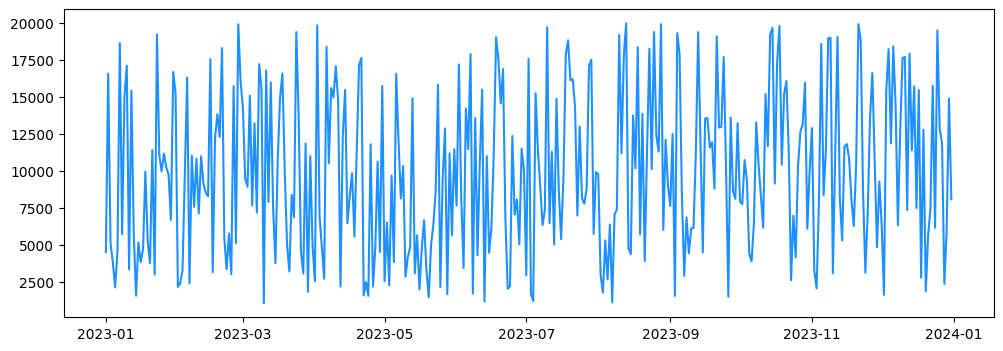

Our colors (if you want them):

*   main chart -- `dodgerblue`


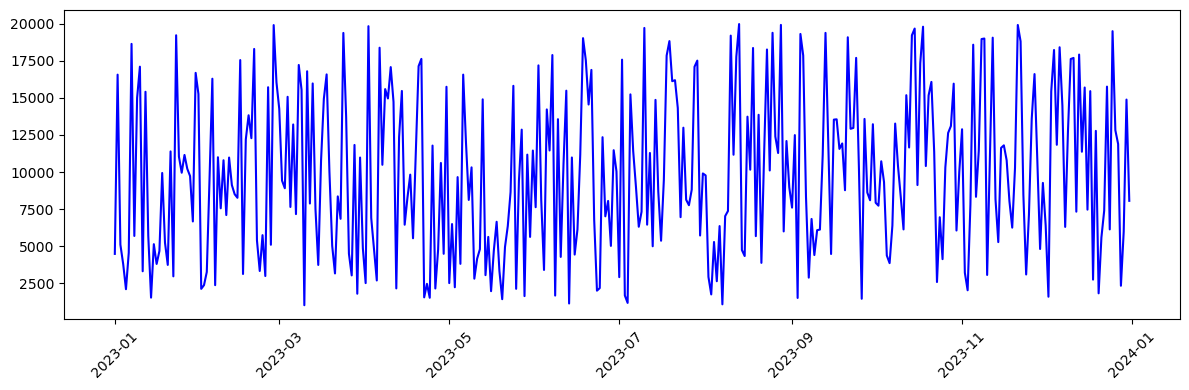

In [50]:
# your code here
import pandas as pd
import matplotlib.pyplot as plt

dates = df['Date']
sales = df['Sales']

# Retrieve data
data = {'Date': dates, 'Sales': sales}

# DataFrame
df = pd.DataFrame(data)

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d %b %Y')

# Sort by date to ensure correct chronological order in the plot
df = df.sort_values('Date')

# Plot the chart
plt.figure(figsize=(12, 4))
plt.plot(df['Date'], df['Sales'], color='blue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##### Let's make our chart a bit more interesting

By adding average and median lines!

Expected result:

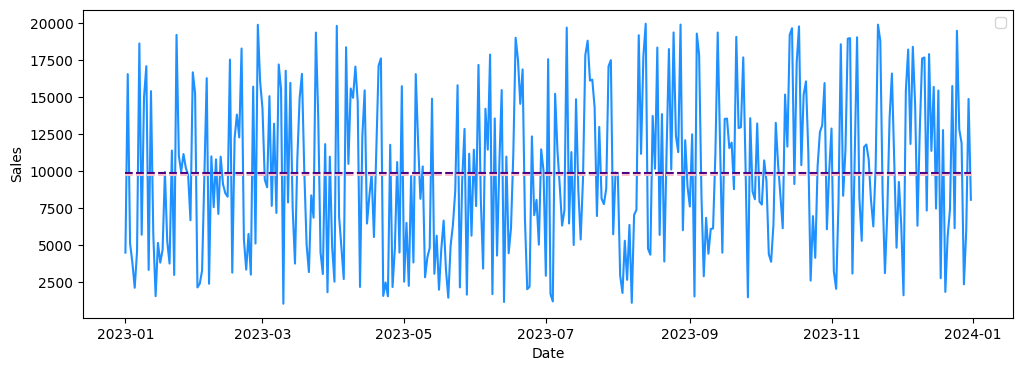

Our colors (if you want them):

*   main chart -- `dodgerblue`
*   average -- `indigo`
*   median -- `pink`

###### Hint for those who want it!

Here's some guidance on how to do it:
* Add columns `Average` and `Median` with same value for all dates
* Plot those columns

###### Place for solution

In [51]:
# Necessary calculations
# Calculate mean and median values
avg = df['Sales'].mean()
med = df['Sales'].median()

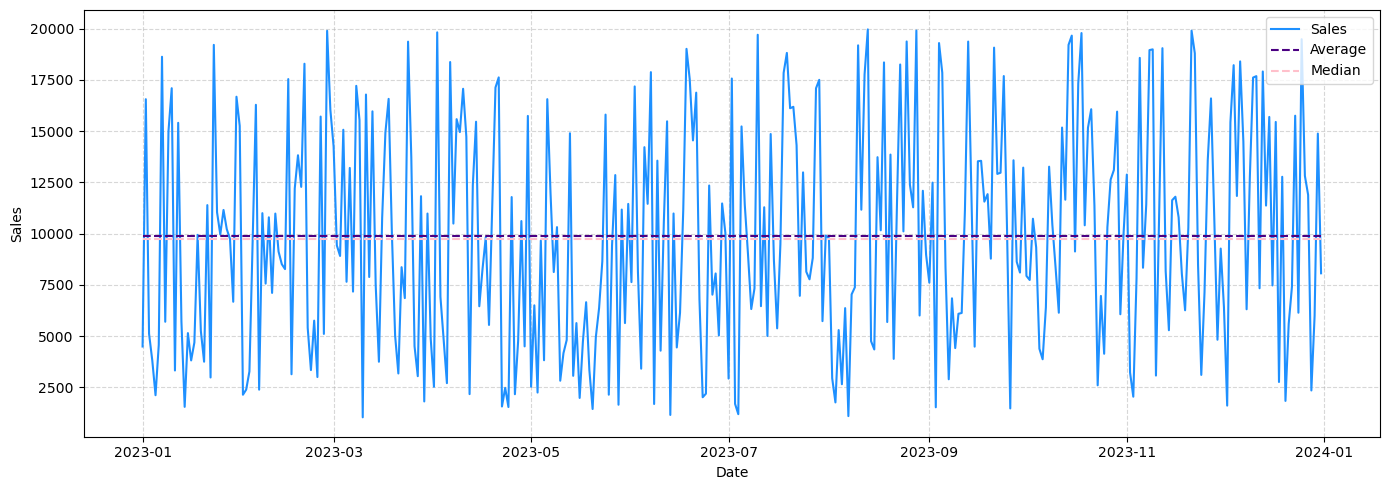

In [53]:
# Plot your chart here
# Reminder: set figsize = (12, 4)

import pandas as pd
import matplotlib.pyplot as plt

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Add 'Average' and 'Median' columns
df['Average'] = avg
df['Median'] = med

# Sort by date to keep the chart in chronological order
df = df.sort_values('Date')

# Plot the chart
plt.figure(figsize=(14, 5))
plt.plot(df['Date'], df['Sales'], label='Sales', color='dodgerblue')
plt.plot(df['Date'], df['Average'], label='Average', color='indigo', linestyle='--')
plt.plot(df['Date'], df['Median'], label='Median', color='pink', linestyle='--')

# Add labels
plt.xlabel('Date')
plt.ylabel('Sales')
#plt.title('Sales Trend with Average and Median')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


###### If you want more: Adding legend and values ***(RESEARCH TASK)***

Find out how to add legends to your charts and make it look like this:

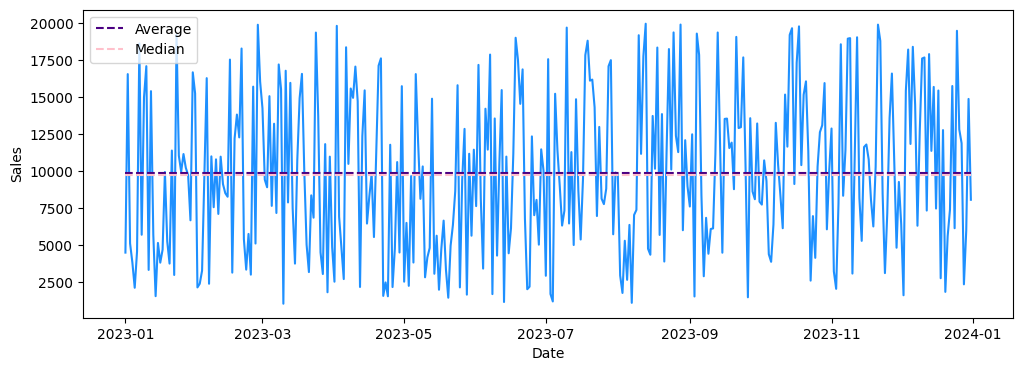

Or even like this (`format strings` will help you here):

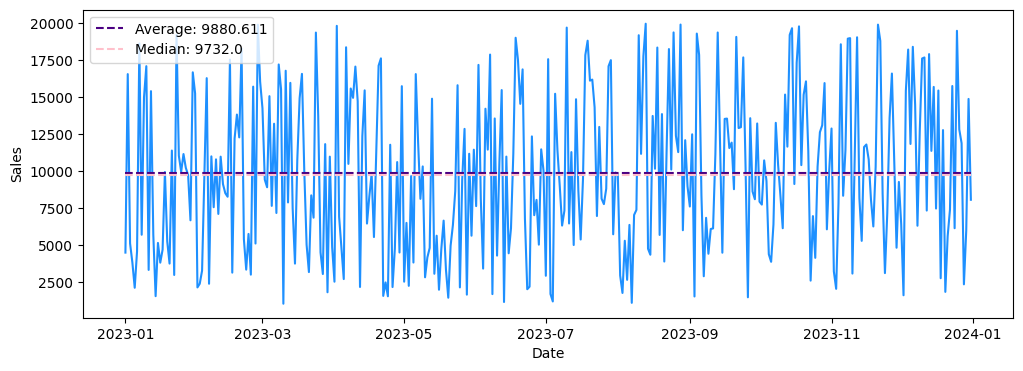

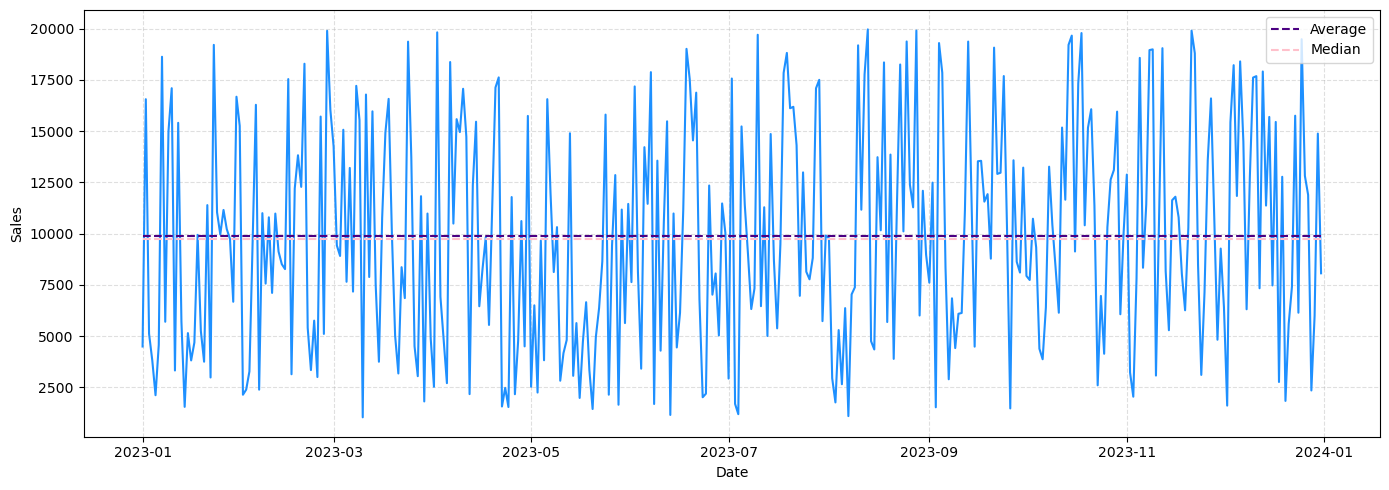

In [54]:
# plot your chart here
# remember about figsize = (12, 4)
import pandas as pd
import matplotlib.pyplot as plt

df['Date'] = pd.to_datetime(df['Date'])  # Convert Date to datetime
df = df.sort_values('Date')              # Sort by date

# Calculate mean and median
average = df['Sales'].mean()
median = df['Sales'].median()

# Plot the chart
plt.figure(figsize=(14, 5))

# Sales curve
plt.plot(df['Date'], df['Sales'], color='dodgerblue', label='_nolegend_') 

# Average line (mean)
plt.plot(df['Date'], [average]*len(df), color='indigo', linestyle='--', linewidth=1.5, label='Average')

# Median line
plt.plot(df['Date'], [median]*len(df), color='pink', linestyle='--', linewidth=1.5, label='Median')

# Labels and display
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend()
plt.tight_layout()
plt.show()


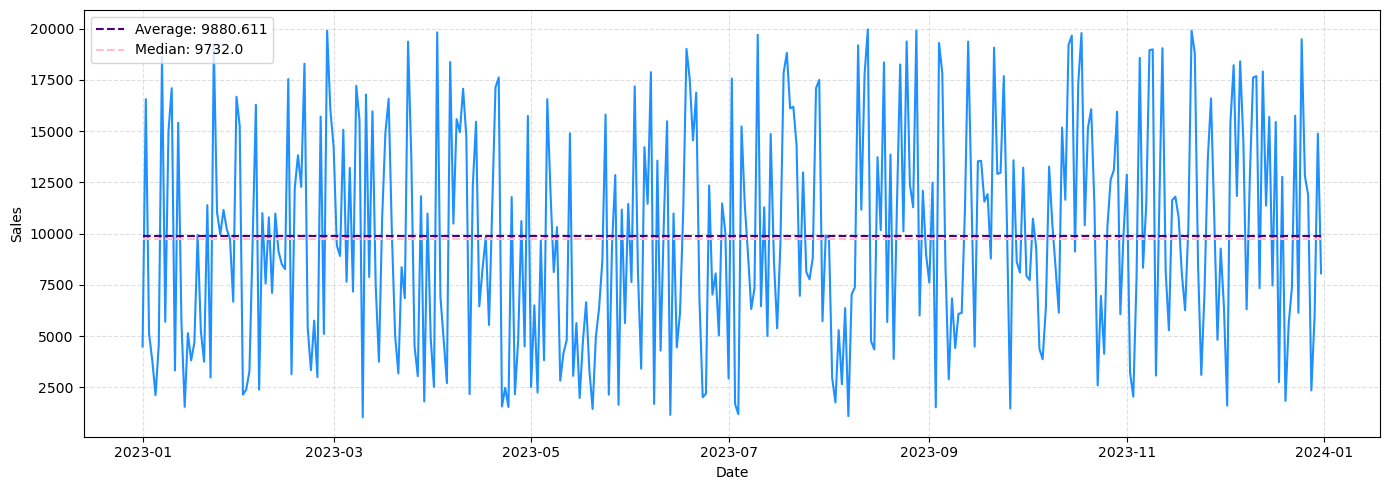

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

# Mean and median
average = df['Sales'].mean()
median = df['Sales'].median()

# Plot the chart
plt.figure(figsize=(14, 5))
plt.plot(df['Date'], df['Sales'], color='dodgerblue', label='_nolegend_')

# Draw the average and median lines, include their values in the label
plt.plot(df['Date'], [average]*len(df), color='indigo', linestyle='--', linewidth=1.5,
         label=f'Average: {average:.3f}')
plt.plot(df['Date'], [median]*len(df), color='pink', linestyle='--', linewidth=1.5,
         label=f'Median: {median:.1f}')

# Chart detail
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend()
plt.tight_layout()
plt.show()


##### Adding dots for max and min!

Expected result:

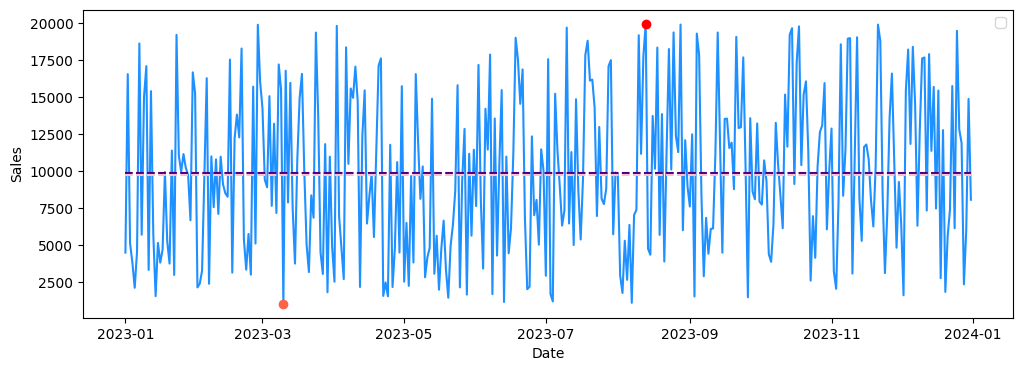

Our colors (if you want them):

*   main chart -- `dodgerblue`
*   average -- `indigo`
*   median -- `pink`
*   max -- `red`
*   min -- `tomato`


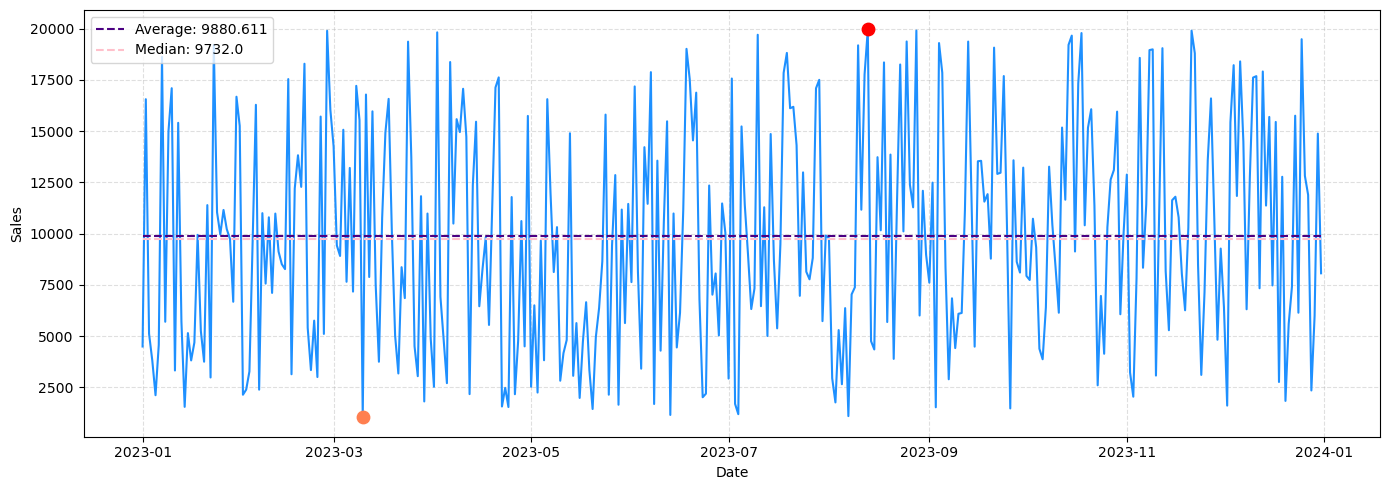

In [56]:
# plot your chart here
# remember about figsize = (12, 4)

import pandas as pd
import matplotlib.pyplot as plt

df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

# Mean and median
average = df['Sales'].mean()
median = df['Sales'].median()

# Find max/min
max_row = df[df['Sales'] == df['Sales'].max()].iloc[0]
min_row = df[df['Sales'] == df['Sales'].min()].iloc[0]

# Plot the chart
plt.figure(figsize=(14, 5))
plt.plot(df['Date'], df['Sales'], color='dodgerblue', label='_nolegend_')

# Average and median lines
plt.plot(df['Date'], [average]*len(df), color='indigo', linestyle='--', linewidth=1.5,
         label=f'Average: {average:.3f}')
plt.plot(df['Date'], [median]*len(df), color='pink', linestyle='--', linewidth=1.5,
         label=f'Median: {median:.1f}')

# Mark max and min
plt.scatter(max_row['Date'], max_row['Sales'], color='red', s=80, zorder=5)
plt.scatter(min_row['Date'], min_row['Sales'], color='coral', s=80, zorder=5)

# Chart detail
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend()
plt.tight_layout()
plt.show()


###### If you want more: Adding legend and values pt. 2

Expected result:

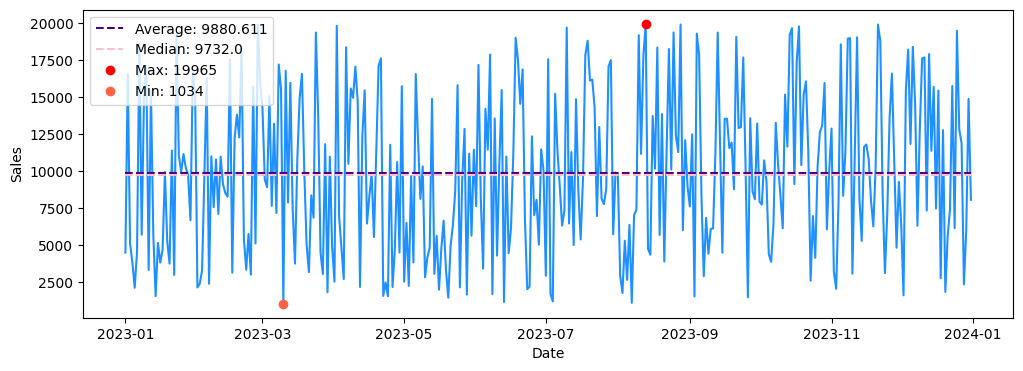

Our colors (if you want them):

*   main chart -- `dodgerblue`
*   average -- `indigo`
*   median -- `pink`
*   max -- `red`
*   min -- `tomato`

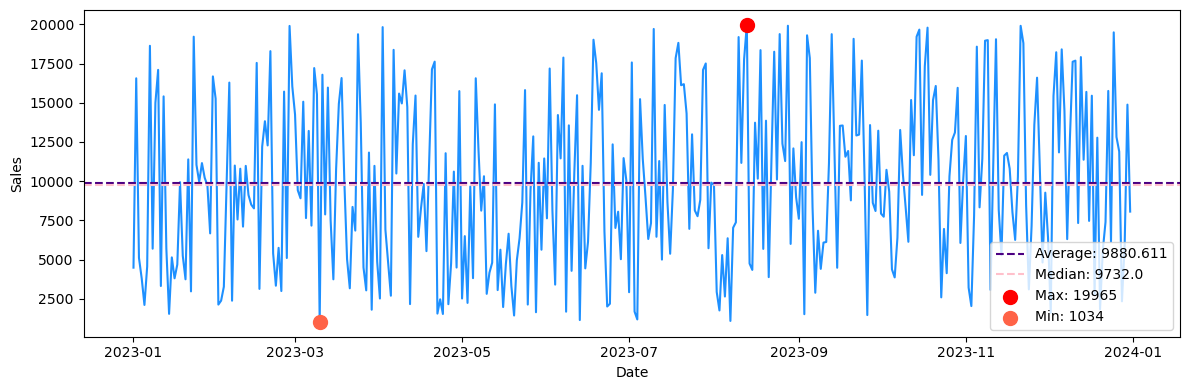

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

dates = df['Date']
sales = df['Sales']

# Calculate statistical values
avg = sales.mean()
med = sales.median()
max_val = sales.max()
min_val = sales.min()
max_date = dates[sales.idxmax()]
min_date = dates[sales.idxmin()]

# Plot the chart
plt.figure(figsize=(12, 4))
plt.plot(dates, sales, color='dodgerblue', label='_nolegend_')  # main line

# Draw the average and median lines
plt.axhline(avg, color='indigo', linestyle='--', label=f'Average: {avg:.3f}')
plt.axhline(med, color='pink', linestyle='--', label=f'Median: {med:.1f}')

# Draw Max/Min
plt.scatter(max_date, max_val, color='red', s=100, label=f'Max: {max_val}', zorder=5)
plt.scatter(min_date, min_val, color='tomato', s=100, label=f'Min: {min_val}', zorder=5)

# Format the chart
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.tight_layout()
plt.show()


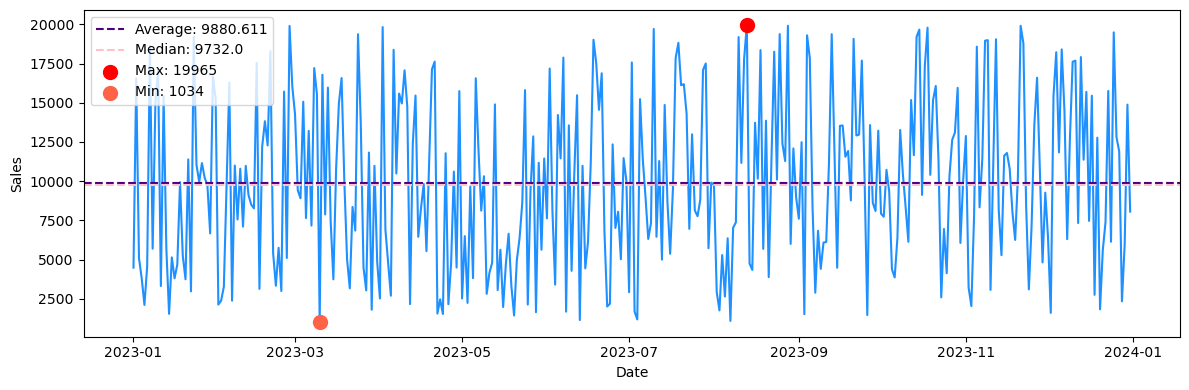

In [58]:
plt.figure(figsize=(12, 4))
plt.plot(dates, sales, color='dodgerblue', label='_nolegend_')

plt.axhline(avg, color='indigo', linestyle='--', label=f'Average: {avg:.3f}')
plt.axhline(med, color='pink', linestyle='--', label=f'Median: {med:.1f}')
plt.scatter(max_date, max_val, color='red', s=100, label=f'Max: {max_val}', zorder=5)
plt.scatter(min_date, min_val, color='tomato', s=100, label=f'Min: {min_val}', zorder=5)

plt.xlabel('Date')
plt.ylabel('Sales')

# Legend 
plt.legend(loc='upper left')  # or loc='center left', bbox_to_anchor=(1, 0.5)
plt.tight_layout()
plt.show()


##### [Just for some fun] Making art!

Let's color our chart by seasons!

Winter is blue, spring is green, summer is yellow and autumn is orange!

We want to see data from `January` till `October` (**included**)

Example of the result:

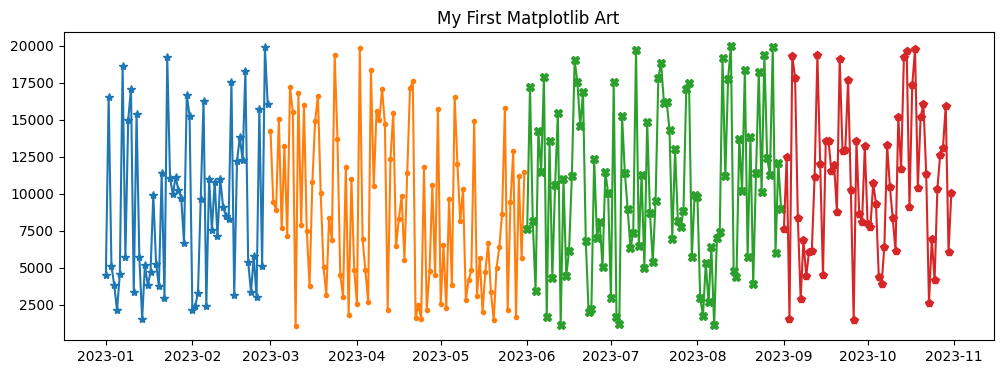


In [59]:
# To make it easier for you we're adding 'Year' and 'Month' columns!

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df.sample(5)

,Date,Sales,Average,Median,Year,Month
303,2023-10-31,10015,9880.610959,9732.0,2023,10
242,2023-08-31,8974,9880.610959,9732.0,2023,8
73,2023-03-15,3746,9880.610959,9732.0,2023,3
247,2023-09-05,17850,9880.610959,9732.0,2023,9
233,2023-08-22,11393,9880.610959,9732.0,2023,8


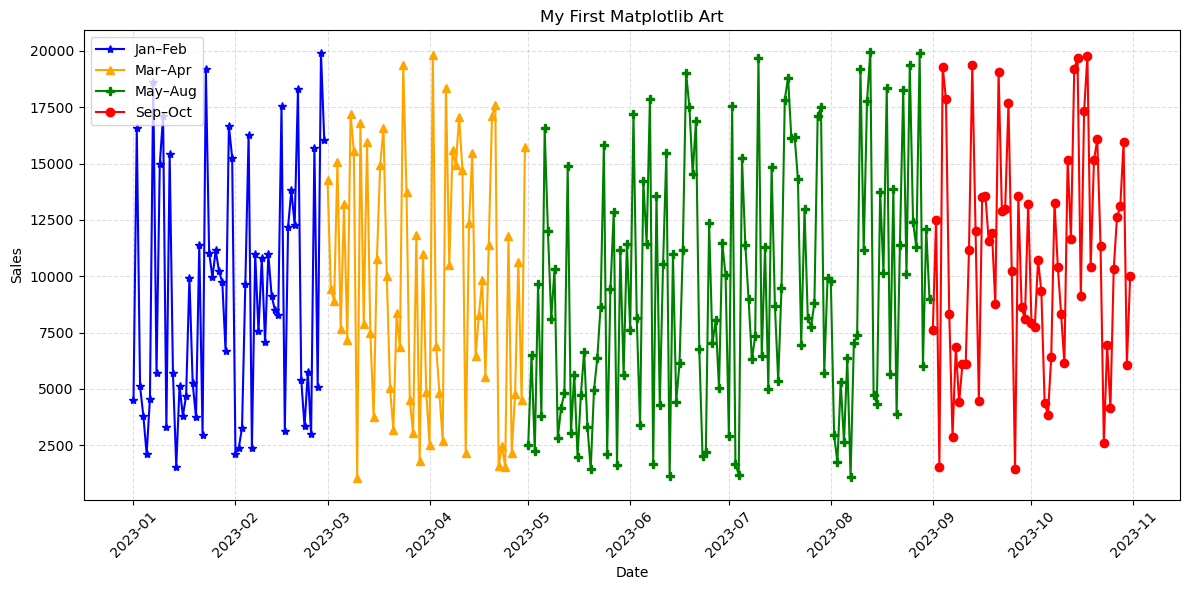

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

df['Date'] = pd.to_datetime(df['Date'])

plt.figure(figsize=(12, 6))

# Segment data by time groups such as quarter or month
# Below is an example of segmentation by months:
segment1 = df[(df['Month'] <= 2)]
segment2 = df[(df['Month'] >= 3) & (df['Month'] <= 4)]
segment3 = df[(df['Month'] >= 5) & (df['Month'] <= 8)]
segment4 = df[(df['Month'] >= 9) & (df['Month'] <= 10)]

# Plot each segment with different colors and markers
plt.plot(segment1['Date'], segment1['Sales'], color='blue', marker='*', label='Jan–Feb')
plt.plot(segment2['Date'], segment2['Sales'], color='orange', marker='^', label='Mar–Apr')
plt.plot(segment3['Date'], segment3['Sales'], color='green', marker='P', label='May–Aug')  # 'P' là marker hoa
plt.plot(segment4['Date'], segment4['Sales'], color='red', marker='o', label='Sep–Oct')

# Customize the display settings
plt.title("My First Matplotlib Art")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()
